In [1]:
# scipy.special for the sigmoid function expit()
import scipy.special
import numpy
import matplotlib.pyplot
%matplotlib inline
# helper to load data from PNG image files
import imageio
# glob helps select multiple files using patterns
import glob

In [2]:
# neural network class definition
class neuralNetwork:
# initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes,learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5),(self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0 , pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        self.activation_function = lambda x: scipy.special.expit(x)
        pass

# train the neural network
    def train(self, inputs_list, targets_list):
        inputs=numpy.array(inputs_list, ndmin=2).T
        targets=numpy.array(targets_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        output_errors=targets - final_outputs
        hidden_errors= numpy.dot(self.who.T, output_errors)
        self.who += self.lr * numpy.dot((output_errors* final_outputs * (1-final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs *(1.0 - hidden_outputs)), numpy.transpose(inputs))
        pass
# query the neural network
    def query(self, inputs_list):
        inputs= numpy.array(inputs_list, ndmin=2).T
        hidden_inputs= numpy.dot(self.wih, inputs)
        hidden_outputs= self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
        pass

In [3]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.1
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [4]:
training_data_file=open("dataset/mnist_train.csv",'r')
training_data_list=training_data_file.readlines()
training_data_file.close()

In [5]:
epochs=10

for e in range(epochs):
    for record in training_data_list:
        all_values= record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass


In [8]:
our_own_dataset = []

# load the png image data as test data set
for image_file_name in glob.glob('images/2828_my_own_?.png'):
    
    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])
    
    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = imageio.imread(image_file_name, as_gray=True)
    
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    # append label and image data  to test data set
    record = numpy.append(label,img_data)
    our_own_dataset.append(record)
    
    pass

loading ...  images\2828_my_own_2.png
0.01
1.0
loading ...  images\2828_my_own_3.png
0.01
1.0
loading ...  images\2828_my_own_4.png
0.01
0.93011767
loading ...  images\2828_my_own_5.png
0.01
0.86800003
loading ...  images\2828_my_own_6.png
0.01
1.0


C:\Users\joeyz\AppData\Local\Temp\ipykernel_3228\2183320529.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_array = imageio.imread(image_file_name, as_gray=True)


[[1.23909661e-03]
 [1.06961537e-03]
 [2.31766155e-02]
 [1.19476832e-04]
 [9.11273325e-01]
 [2.95244660e-02]
 [2.87602687e-02]
 [1.85892044e-02]
 [1.12331119e-03]
 [3.69661505e-04]]
network says  4
match!


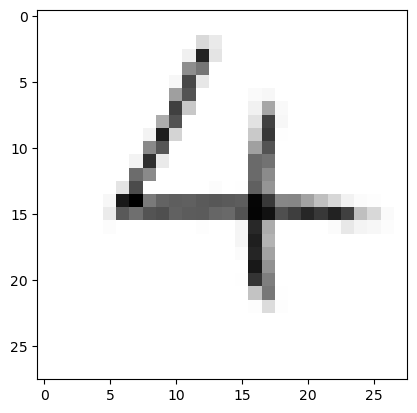

In [9]:
item = 2

# plot image
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass

In [6]:
test_data_file = open("dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()


In [7]:
scorecard = []
# go through all the records in the test data set
for record in test_data_list:
# split the record by the ',' commas
    all_values = record.split(',')
# correct answer is first value
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
# scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
# query the network
    outputs = n.query(inputs)
# the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    print(label, "network's answer")
# append correct or incorrect to list
    if (label == correct_label):scorecard.append(1)
    else:
# network's answer doesn't match correct answer, add 0 to
        scorecard
        scorecard.append(0)
        pass
    pass

7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
5 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
0 correct label
0 ne

In [8]:
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() /
scorecard_array.size)

performance =  0.9713
